Aarya Motiwala 
*   PRN-1132200331
*   ROLL no -8









**Exercise ▶**

---


Access the dataset available in the folder shared with you ( HR_comma_sep.csv )
Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they
leave the company or continue to work)
Plot bar charts showing impact of employee salaries on retention
Plot bar charts showing corelation between department and employee retention
Now build logistic regression model using variables that were narrowed down in step 1
Measure the accuracy of the model

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('/content/drive/MyDrive/ML LAB2/Copy of HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
import seaborn as sns


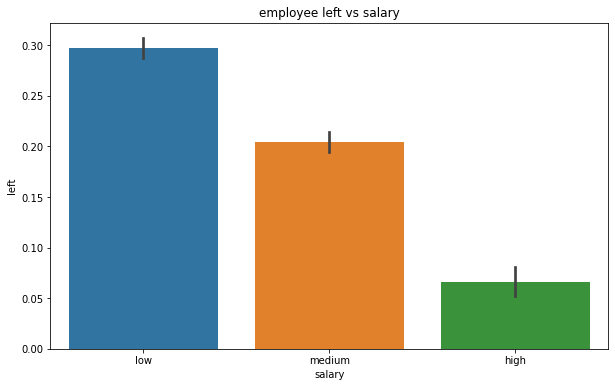

In [4]:

plt.figure(figsize=(10,6))


plt.title("employee left vs salary")

# Bar chart 
sns.barplot(x=df['salary'], y=df['left'])



In [5]:
df2=df.groupby(['salary'])['left'].count()
df2

salary
high      1237
low       7316
medium    6446
Name: left, dtype: int64

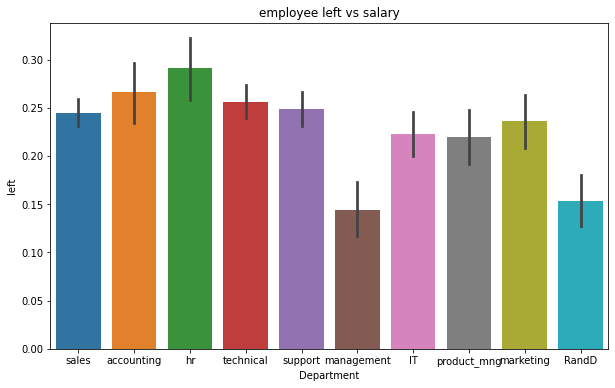

In [6]:
# Set the width and height of the figure
plt.figure(figsize=(10,6))

# Add title
plt.title("employee left vs salary")


sns.barplot(x=df['Department'], y=df['left'])


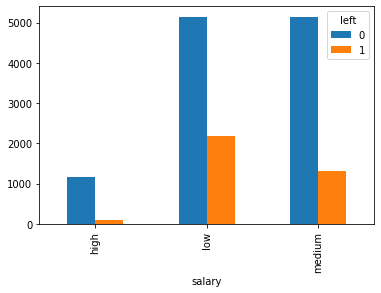

In [8]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

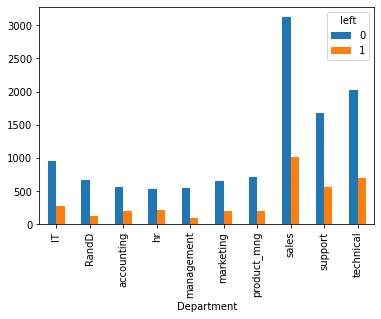

In [9]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

In [7]:
print(df.corr())

                       satisfaction_level  last_evaluation  number_project  \
satisfaction_level               1.000000         0.105021       -0.142970   
last_evaluation                  0.105021         1.000000        0.349333   
number_project                  -0.142970         0.349333        1.000000   
average_montly_hours            -0.020048         0.339742        0.417211   
time_spend_company              -0.100866         0.131591        0.196786   
Work_accident                    0.058697        -0.007104       -0.004741   
left                            -0.388375         0.006567        0.023787   
promotion_last_5years            0.025605        -0.008684       -0.006064   

                       average_montly_hours  time_spend_company  \
satisfaction_level                -0.020048           -0.100866   
last_evaluation                    0.339742            0.131591   
number_project                     0.417211            0.196786   
average_montly_hours         

From the data correlation  we can say that we following variables will be more beneficial in our model for drawing conclusions
1. Satisfaction Level
2. Average Monthly Hours
3. Promotion Last 5 Years
4. Salary

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#by satisfaction level

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[['satisfaction_level']],df.left,train_size=0.8)

In [ ]:
X_test

,satisfaction_level
6813,0.17
6992,0.63
3396,0.58
10067,0.81
11395,0.54
...,...
4270,0.85
11625,0.68
9757,0.85
7934,0.34


In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)
LogisticRegression()

LogisticRegression()

In [ ]:
X_test

,satisfaction_level
6813,0.17
6992,0.63
3396,0.58
10067,0.81
11395,0.54
...,...
4270,0.85
11625,0.68
9757,0.85
7934,0.34


In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
model.predict_proba(X_test)

array([[0.41731054, 0.58268946],
       [0.8076289 , 0.1923711 ],
       [0.77598985, 0.22401015],
       ...,
       [0.90724751, 0.09275249],
       [0.5792639 , 0.4207361 ],
       [0.66055383, 0.33944617]])

In [ ]:
model.score(X_test,y_test) # ACCURACY

0.7683333333333333

In [ ]:
y_predicted

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
# by salary

In [10]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [11]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [12]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [13]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [14]:
y = df.left

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

LogisticRegression()

In [19]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
model.score(X_test,y_test)

0.7764761904761904